# <h1 align = 'center'>**TEAM ID:**  PTID-CDS-JAN-24-1772
# <h1 align= 'center'>**PROJECT ID:** PRCP-1009-CellphonePrice


## **Business case:**
<p align = 'justify'>Bob has started his own mobile company. He wants to give a tough fight to big companies like Apple, Samsung etc.
He does not know how to estimate the price of mobiles his company creates. In this competitive mobile phone market, you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
In this problem you do not have to predict the actual price but a price range indicating how high the price is.

#### PROBLEM STATEMENT

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.


## **Importing basic libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Importing the dataset:**

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("/content/datasets_11167_15520_train.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## **Domain analysis:**

-  This dataset provides the price range of cell phones based on their respective specifications.
- The target variable is the 'price_range' and the the factors affecting the price_range are taken as the independent features such as follows:
<ol>
<li>battery_power- Total energy a battery can store in one time measured in mAh(milliampere-hour)i.e., it shows how long a device will run before the battery charge is run out.</li>
<li>blue- whether the device has the bluetooth or not</li>
<li>clock_speed- speed at which the micr0processor executes instructions</li>
<li>dual_sim- has dual sim or not</li>
<li>fc- front camera (Megapixels)</li>
<li>four_g- has 4G or not</li>
<li>int_memory- Internal memory in(gigabytes)</li>
<li>m_dep- mobile depth in(Cm)</li>
<li>mobile_wt- Weight of mobile phone
<li>n_cores- Number of cores of processor
<li>pc- primary camera (Megapixels)
<li>px_height- Pixel resolution height
<li>px-weight- pixel resolution width
<li>ram- Random access memory in(Megabytes)
<li>sc_h- Screen height of mobile in Cm
<li>sc_w- Screen width  mobile in cm
<li>talk_time- Longest time that a single battery charge will last when you are constantly talking on the phone
<li>three_g- has 3G or not
<li>touch_screen- has touch screen or not
<li>wifi- has wifi or not
- The target variable 'price_range' has the following categories:
<ul>
<li>0- Low cost
<li>1- Medium cost
<li>2- High cost
<li>3- Very High cost


## Basic checks:

In [35]:
# viewing dimension of the data

x= data.shape
print(x)
print(f'rows: {x[0]}\ncolumns: {x[1]}')

(2000, 21)
rows: 2000
columns: 21


In [4]:
# first five rows

data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
# last five records

data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [6]:
# column names

data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
# showing datatypes

data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

#### Insights:
- All the columns shows the numerical datatypes of int and float.
- clock_speed and m_dep shows float64 datatype.
- The rest of the features have int64 datatype.

In [8]:
# Basic information about the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
# Insights:
# There are no null values and all the features are of numerical datatypes.

In [59]:
# Statistical information

data.describe().T.sort_values('std', ascending = False)\
.style.background_gradient(cmap='flare')



,count,mean,std,min,25%,50%,75%,max
ram,2000.000000,2124.213000,1084.732044,256.000000,1207.500000,2146.500000,3064.500000,3998.000000
px_height,2000.000000,645.108000,443.780811,0.000000,282.750000,564.000000,947.250000,1960.000000
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
px_width,2000.000000,1251.515500,432.199447,500.000000,874.750000,1247.000000,1633.000000,1998.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
pc,2000.000000,9.916500,6.064315,0.000000,5.000000,10.000000,15.000000,20.000000
talk_time,2000.000000,11.011000,5.463955,2.000000,6.000000,11.000000,16.000000,20.000000
sc_w,2000.000000,5.767000,4.356398,0.000000,2.000000,5.000000,9.000000,18.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000


#### Insights:
- Each feature has 2000 records with no null values.
- The average of **RAM** is around 2124 megabytes ranging from minimum of 256MB to maximum of 4000MB.
- The **px_height** has mean value of 645 with a minimum value of 0 and maximum of 1960. The **minimum pixel height** for cell phones can vary depending on factors such as the device's screen size, resolution, and aspect ratio. However in modern smartphones, the minimum pixel height for a usable display is typically around 480 pixels or higher for smaller screens. Hence this minimum value needs to be corrected.
- The averge value of the **battery power** is around 1240mAh ranging from a minimum of 500mAh and maximum of 2000mAh.
- The average **px_width** is around 1250 with a minimum of 500 to a maximum of 2000.
- The average **mobile_wt** is around 140g with a minimum of 80g and a maximum of 200g.
- The mean **int_memory** is around 32GB. The minimum value is around 2GB and a maximum of 64GB.
- The rest of the features have discrete values. But there are certain features that show minimum values, which do not seem to be rational. They are:
<dl>
<dt>m_dep(mobile depth in cm)
<dd>- shows minimum value as 0.1cm (1mm) whereas most of the smartphones have a minimum thickness ranging from around 6mm to 10mm.
<dt>px_height (pixel resolution height)
<dd>-The minimum value is 0 here, but in modern smartphones, the minimum pixel height for a usable display is typically around 480 pixels or higher for smaller screens
<dt>sc_w(screen width in cm)
<dd>- the data shows 0cm as the minimum value whereas smartphones typically have screen widths ranging from around 2 inches (5.08cm) to 6 inches or more.



In [11]:
# no of unique elements in each of the columns

data.nunique().to_frame().T

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1094,2,26,2,20,2,63,10,121,8,21,1137,1109,1562,15,19,19,2,2,2,4


#### Insights:
Based on the count of unique values in all the features, it is clear as such follows:
<dl>
<dt>Continuous features
<dd>- battery_power, clock_speed, int_memory, mobile_wt, px_height, px_width, ram.
<dt>discrete features
<dd>- blue, dual_sim, fc, four_g, m_dep, n_cores, pc, sc_h, sc_w, talk_time, three_g, touch_screen, wifi.

## Exploratory data analysis:

### UNIVARIATE ANALYSIS:


#### Distribution of Categorical/ discrete and numerical features:

In [38]:
target= 'price_range'
independent_features= [column for column in data.drop(target, axis=1)]

# let's take a threshold of less than 25 unique values for a feature to be
# considered as a categorical feature
categorical_features= [column for column in independent_features if data[column].nunique() < 25]
continuous_features= [column for column in independent_features if data[column].nunique() >=25]

print(f'Target variable: {target}\nTotal no of independent features (except target): {len(independent_features)}')
print(f'No of categorical features (<25 distinct values): {len(categorical_features)}')
print(f'No of continuous features: {len(continuous_features)}')

Target variable: price_range
Total no of independent features (except target): 20
No of categorical features (<25 distinct values): 13
No of continuous features: 7


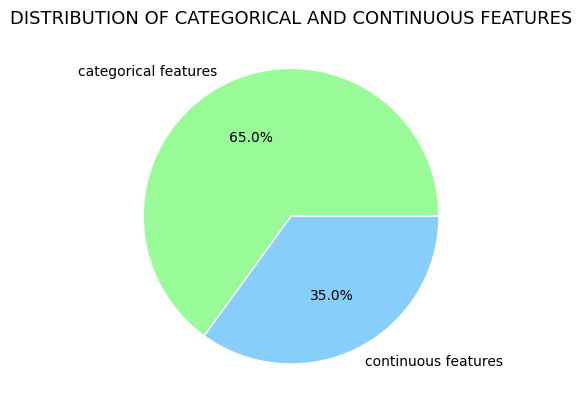

In [43]:
# pie chart showing the distribution
plt.pie([len(categorical_features), len(continuous_features)],
        labels= ['categorical features', 'continuous features'],
        colors= ['palegreen','lightskyblue'],
        textprops= {'fontsize': 10},
        wedgeprops= {'edgecolor': 'white'},
        autopct= '%.1f%%')

plt.title('DISTRIBUTION OF CATEGORICAL AND CONTINUOUS FEATURES', fontsize= 13)
plt.show()

#### Target variable:

In [45]:
value_counts= data['price_range'].value_counts()
value_counts
# 0- Low cost
# 1- Medium cost
# 2- High cost
# 3- Very High cost

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

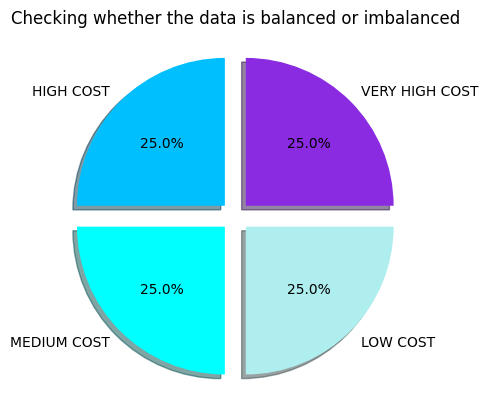

In [58]:
# defining labels and colors

labels= [f'{"VERY HIGH COST" if i==0 else "HIGH COST" if i ==1 else "MEDIUM COST" if i ==2 else "LOW COST"}'
         for i in range(len(value_counts))]

colors= ['blueviolet', 'deepskyblue', 'aqua', 'paleturquoise']

# creating piechart by plotting the percentage values of unique values

fig, ax= plt.subplots()
ax.pie(value_counts.values,
       labels= labels,
       colors= colors,
       autopct= '%.1f%%',
       explode= [0.1, 0.1, 0.1, 0.1],
       shadow= True)


plt.title('Checking whether the data is balanced or imbalanced')
plt.show()

##### Insights:
- The above piechart shows that the target variable has the equal count in all the classes. Hence the data is completely balanced.

#### Categorical features: